In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
from scipy import fftpack
import datetime

In [4]:
main_data = pd.read_csv('preci_daily.csv')
data = pd.read_csv('MFCC_data4yr.csv')

In [5]:
main_data.head()

,Unnamed: 0,date,value
0,0,2000-06-01,15.374338
1,1,2000-06-02,25.502878
2,2,2000-06-03,64.144657
3,3,2000-06-04,28.498881
4,4,2000-06-05,76.216727


In [6]:
data.head()

,Unnamed: 0,date,value
0,0,2016-01-01,0.000000
1,1,2016-01-02,0.009253
2,2,2016-01-03,0.000522
3,3,2016-01-04,0.000000
4,4,2016-01-05,0.004002


In [7]:
N = data.shape[0]
sr = 1
y = np.array(data['value'])
y

array([0.        , 0.00925286, 0.00052169, ..., 0.00195913, 0.        ,
       0.        ])

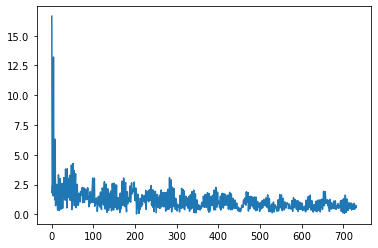

In [8]:
T = 1.0 / N
x = np.linspace(0.0, N*T, N)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

In [9]:
yf

array([12153.44849249   -0.j        ,  1257.56565429 -359.28887379j,
        1150.14736563+1356.28630746j, ...,  -693.76189206 -893.31425543j,
        1150.14736563-1356.28630746j,  1257.56565429 +359.28887379j])

In [10]:
f = fftpack.fftfreq(len(y))
f

array([ 0.        ,  0.00068446,  0.00136893, ..., -0.00205339,
       -0.00136893, -0.00068446])

,Unnamed: 0,date,value
0,0,2000-06-01,15.374338
1,1,2000-06-02,25.502878
2,2,2000-06-03,64.144657
3,3,2000-06-04,28.498881
4,4,2000-06-05,76.216727
...,...,...,...
7392,7392,2020-08-27,2.725129
7393,7393,2020-08-28,13.800386
7394,7394,2020-08-29,37.203127
7395,7395,2020-08-30,13.765517


In [11]:
np.abs(f[:N//2])

array([0.        , 0.00068446, 0.00136893, 0.00205339, 0.00273785,
       0.00342231, 0.00410678, 0.00479124, 0.0054757 , 0.00616016,
       0.00684463, 0.00752909, 0.00821355, 0.00889802, 0.00958248,
       0.01026694, 0.0109514 , 0.01163587, 0.01232033, 0.01300479,
       0.01368925, 0.01437372, 0.01505818, 0.01574264, 0.0164271 ,
       0.01711157, 0.01779603, 0.01848049, 0.01916496, 0.01984942,
       0.02053388, 0.02121834, 0.02190281, 0.02258727, 0.02327173,
       0.02395619, 0.02464066, 0.02532512, 0.02600958, 0.02669405,
       0.02737851, 0.02806297, 0.02874743, 0.0294319 , 0.03011636,
       0.03080082, 0.03148528, 0.03216975, 0.03285421, 0.03353867,
       0.03422313, 0.0349076 , 0.03559206, 0.03627652, 0.03696099,
       0.03764545, 0.03832991, 0.03901437, 0.03969884, 0.0403833 ,
       0.04106776, 0.04175222, 0.04243669, 0.04312115, 0.04380561,
       0.04449008, 0.04517454, 0.045859  , 0.04654346, 0.04722793,
       0.04791239, 0.04859685, 0.04928131, 0.04996578, 0.05065

In [12]:
2.0/N * np.abs(yf[:N//2])

array([16.63716426,  1.79039526,  2.43436027,  1.54834837, 13.2086299 ,
        1.79081821,  2.11111903,  1.21819819,  6.30723073,  0.71944402,
        1.37120774,  1.04015183,  2.51620576,  1.19003875,  0.35127563,
        1.37670477,  3.30690224,  2.34255054,  0.31206164,  1.35433781,
        2.98339663,  2.54018159,  0.42369278,  1.23265766,  2.52908188,
        2.58363415,  0.50148086,  1.65284969,  2.18743429,  3.07432154,
        1.44716321,  2.55483742,  1.18381555,  3.80329891,  2.20222922,
        3.09037853,  0.53391547,  3.81976105,  2.0489302 ,  3.01744953,
        1.4171536 ,  2.61129603,  1.55774935,  3.27635766,  1.17037158,
        1.93652564,  1.37981247,  4.13600045,  0.3927781 ,  3.04710219,
        1.10641706,  4.26455197,  1.98628315,  3.68771045,  0.72364799,
        3.31319778,  2.61993365,  3.39687371,  0.55313094,  1.67316619,
        1.83761648,  2.51900574,  1.10649128,  0.7345378 ,  0.82629137,
        1.7556225 ,  1.75667848,  1.49336902,  1.03952187,  1.92

In [13]:
freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
freq_ampli

,Freq,Ampli
0,0.000000,16.637164
1,0.000684,1.790395
2,0.001369,2.434360
3,0.002053,1.548348
4,0.002738,13.208630
...,...,...
725,0.496235,0.420762
726,0.496920,0.730139
727,0.497604,0.496461
728,0.498289,0.758018


In [47]:
freq_ampli.to_csv('Freq.csv')

In [50]:
1/0.002738

365.23009495982467

In [51]:
1/0.0054757 

182.6250525047026

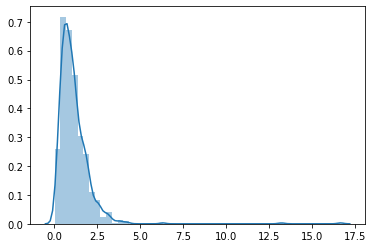

In [14]:
sns.distplot( 2.0/N * np.abs(yf[:N//2]))

In [15]:
freq_ampli

,Freq,Ampli
0,0.000000,16.637164
1,0.000684,1.790395
2,0.001369,2.434360
3,0.002053,1.548348
4,0.002738,13.208630
...,...,...
725,0.496235,0.420762
726,0.496920,0.730139
727,0.497604,0.496461
728,0.498289,0.758018


In [16]:
sorted_f = freq_ampli.sort_values(by='Ampli', ascending=False)

In [17]:
sorted_f.head(50)

,Freq,Ampli
0,0.000000,16.637164
4,0.002738,13.208630
8,0.005476,6.307231
51,0.034908,4.264552
47,0.032170,4.136000
37,0.025325,3.819761
33,0.022587,3.803299
53,0.036277,3.687710
57,0.039014,3.396874
55,0.037645,3.313198


In [18]:
sorted_f['time_period'] = sorted_f['Freq'].apply(lambda x: 1/x if x != 0 else 0)
sorted_f

,Freq,Ampli,time_period
0,0.000000,16.637164,0.000000
4,0.002738,13.208630,365.250000
8,0.005476,6.307231,182.625000
51,0.034908,4.264552,28.647059
47,0.032170,4.136000,31.085106
...,...,...,...
528,0.361396,0.121198,2.767045
697,0.477070,0.112070,2.096126
701,0.479808,0.086103,2.084165
209,0.143053,0.075288,6.990431


In [19]:
main_data['date'] = pd.to_datetime(main_data['date'])
main_data['Year'] = main_data['date'].dt.year
main_data

,Unnamed: 0,date,value,Year
0,0,2000-06-01,15.374338,2000
1,1,2000-06-02,25.502878,2000
2,2,2000-06-03,64.144657,2000
3,3,2000-06-04,28.498881,2000
4,4,2000-06-05,76.216727,2000
...,...,...,...,...
7392,7392,2020-08-27,2.725129,2020
7393,7393,2020-08-28,13.800386,2020
7394,7394,2020-08-29,37.203127,2020
7395,7395,2020-08-30,13.765517,2020


In [20]:
for i in range(2001,2015):
    d6 = main_data[main_data['Year'] == i]
    d7 = main_data[main_data['Year'] == i+1]
    d8 = main_data[main_data['Year'] == i+2]
    d9 = main_data[main_data['Year'] == i+3]
    dx = pd.concat([d6,d7,d8,d9])
    y = np.array(data['value'])
    

,Unnamed: 0,date,value,Year
5327,5327,2015-01-01,0.150001,2015
5328,5328,2015-01-02,0.010902,2015
5329,5329,2015-01-03,0.000000,2015
5330,5330,2015-01-04,0.000000,2015
5331,5331,2015-01-05,0.001744,2015
...,...,...,...,...
6783,6783,2018-12-27,0.000000,2018
6784,6784,2018-12-28,0.000000,2018
6785,6785,2018-12-29,0.000000,2018
6786,6786,2018-12-30,0.000000,2018


In [76]:
d = sorted_f['time_period'].iloc[1:50]

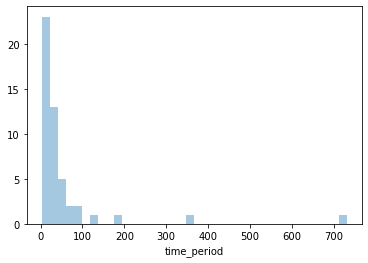

In [77]:
sns.distplot(d,kde = False)

In [86]:
k = []
for i in range(0,750,2):
    k.append(i)

(0.0, 70.0)

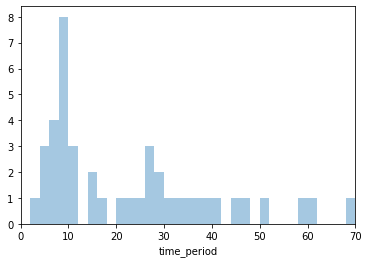

In [98]:
sns.distplot(d, bins = k ,kde = False)
plt.xlim(0,70)               # ~125,185,365,730   count=1

In [101]:
#YYYY-MM-DD
dates = [('2001-01-01','2001-12-31')]
for i in range(2,20):
    if i < 10:
        dates.append((dates[0][0][:3]+str(i)+dates[0][0][4:],dates[0][1][:3]+str(i)+dates[0][1][4:]))
    else:
        dates.append((dates[0][0][:2]+str(i)+dates[0][0][4:],dates[0][1][:2]+str(i)+dates[0][1][4:]))
dates

[('2001-01-01', '2001-12-31'),
 ('2002-01-01', '2002-12-31'),
 ('2003-01-01', '2003-12-31'),
 ('2004-01-01', '2004-12-31'),
 ('2005-01-01', '2005-12-31'),
 ('2006-01-01', '2006-12-31'),
 ('2007-01-01', '2007-12-31'),
 ('2008-01-01', '2008-12-31'),
 ('2009-01-01', '2009-12-31'),
 ('2010-01-01', '2010-12-31'),
 ('2011-01-01', '2011-12-31'),
 ('2012-01-01', '2012-12-31'),
 ('2013-01-01', '2013-12-31'),
 ('2014-01-01', '2014-12-31'),
 ('2015-01-01', '2015-12-31'),
 ('2016-01-01', '2016-12-31'),
 ('2017-01-01', '2017-12-31'),
 ('2018-01-01', '2018-12-31'),
 ('2019-01-01', '2019-12-31')]